In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
import os

directory = '../tmp_tables/'
filenames = os.listdir(directory)
paths = ['{}{}'.format(directory, filename) for filename in filenames]
df = pd.read_csv(paths[1], sep=';')
df

,Размер массива,Выбором Случайные [0..5],Выбором Случайные [0..4000],Выбором Почти отсортированный [0..4000],Выбором Обратно отсортированный [4100 -> 1],Пузырьковая Случайные [0..5],Пузырьковая Случайные [0..4000],Пузырьковая Почти отсортированный [0..4000],Пузырьковая Обратно отсортированный [4100 -> 1],Пузырьковая_Айверсон1 Случайные [0..5],...,Быстрая_Хоар Почти отсортированный [0..4000],Быстрая_Хоар Обратно отсортированный [4100 -> 1],Быстрая_Ломуто Случайные [0..5],Быстрая_Ломуто Случайные [0..4000],Быстрая_Ломуто Почти отсортированный [0..4000],Быстрая_Ломуто Обратно отсортированный [4100 -> 1],Пирамидальная Случайные [0..5],Пирамидальная Случайные [0..4000],Пирамидальная Почти отсортированный [0..4000],Пирамидальная Обратно отсортированный [4100 -> 1]
0,50,3222,3023,2473,2830,3127,3380,1513,1518,3578,...,1377,995,1434,1489,1982,2130,1832,1841,1842,1547
1,60,4075,4086,3698,3713,3714,4209,1880,1983,4434,...,1497,1011,1664,1774,2737,2706,2067,2160,2104,1797
2,70,5303,5455,5012,4969,4595,5321,2403,2536,5399,...,1767,1044,1817,2069,3355,3251,2381,2561,2385,2059
3,80,6697,6844,6611,6128,5702,6680,2856,3227,6789,...,1996,1203,2023,2370,4101,3972,2681,2900,2794,2393
4,90,8452,8554,8395,7629,6696,8163,3416,4015,8264,...,2263,1253,2367,2638,4950,4816,3019,3248,3219,2692
5,100,10329,10430,10453,9351,7983,9500,4116,4964,10268,...,2452,1326,2671,3045,3947,5788,3401,3609,3629,3003
6,110,12483,12466,12608,11273,9489,11121,4775,6072,11924,...,2703,1225,2900,3354,4997,6877,3769,4079,4112,3331
7,120,14751,14865,14885,13123,10765,12973,5491,7311,13808,...,2803,1379,3294,3672,6076,8061,4184,4460,4435,3648
8,130,17161,17398,17537,15195,12253,15130,6314,8745,16180,...,3003,1410,3689,3885,7465,9213,4461,4974,4881,4060
9,140,19674,20208,20193,17675,13914,16950,7545,10456,18163,...,3456,1530,4238,4395,8788,10338,4759,5363,5193,4346


Группировка по типам массивов

In [55]:
new_data = list()
titles = list()

for i in range(1, 5):
    data = df[df.columns[i::4]]
    titles.append(data.columns[0][str(data.columns[0]).index(' '):])
    data.insert(0, 'Размер массива', df.loc[:, 'Размер массива'])
    renamer = {k: k.split()[0] for k in data.columns[1:]}
    data = data.rename(columns=renamer)
    new_data.append(data)
new_data[3]

,Размер массива,Выбором,Пузырьковая,Пузырьковая_Айверсон1,Пузырьковая_Айверсон2,Вставками,Бинарными_вставками,Подсчетом_устойчивая,Цифровая,Слиянием,Быстрая_Хоар,Быстрая_Ломуто,Пирамидальная
0,50,2830,1518,1531,1529,1281,1800,681,911,1886,995,2130,1547
1,60,3713,1983,2052,1967,1602,2317,667,941,2038,1011,2706,1797
2,70,4969,2536,2590,2533,1777,2953,700,1000,2280,1044,3251,2059
3,80,6128,3227,3313,3179,2122,3652,751,1050,2428,1203,3972,2393
4,90,7629,4015,4096,4046,2542,4542,712,1102,2710,1253,4816,2692
5,100,9351,4964,5135,4944,2986,5507,736,1162,2949,1326,5788,3003
6,110,11273,6072,6400,5993,3508,6574,741,1239,3284,1225,6877,3331
7,120,13123,7311,7618,7180,4010,7775,761,1262,3459,1379,8061,3648
8,130,15195,8745,9050,8526,4511,9183,1115,1393,3784,1410,9213,4060
9,140,17675,10456,10608,10010,5124,10593,900,1393,3997,1530,10338,4346


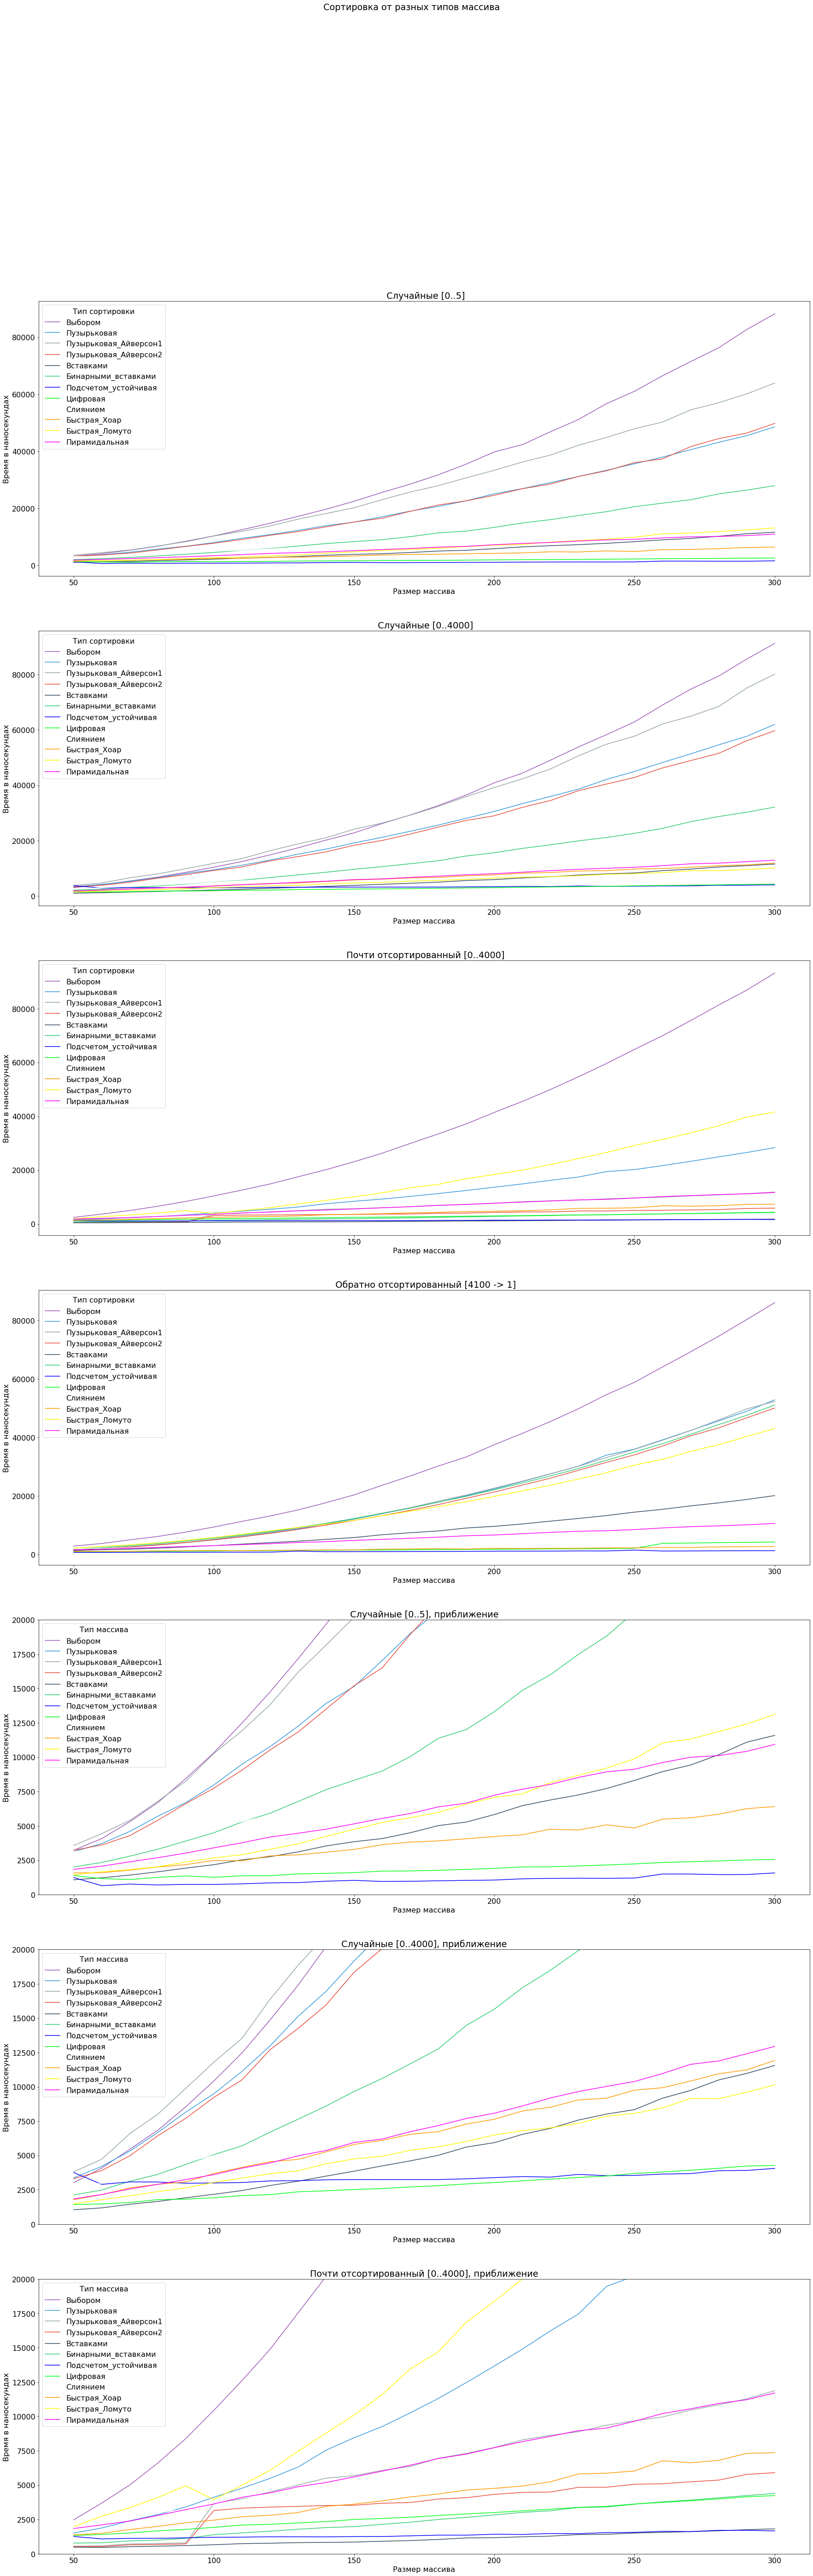

In [59]:
fig, axes = plt.subplots(len(new_data) + 3, 1, figsize=(30, 90))
plt.rcParams.update({'font.size': 16})
for ax in axes:
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(16)
fig.suptitle('Сортировка от разных типов массива')

pal = [
    "#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71",
    "#0400ff", "#00ff1a", "#fcfffd", "#f90", "#fff700", "#ff00f7"
]

for ind, data in enumerate(new_data):
    sns.lineplot(palette=pal,
                 ax=axes[ind],
                 data=pd.melt(data, 'Размер массива', var_name='Тип сортировки', value_name='Время в наносекундах'),
                 x='Размер массива', y='Время в наносекундах', hue='Тип сортировки')
    axes[ind].set_title(titles[ind])

sns.lineplot(palette=pal,
             ax=axes[len(new_data)],
             data=pd.melt(new_data[0], 'Размер массива', var_name='Тип массива', value_name='Время в наносекундах'),
             x='Размер массива', y='Время в наносекундах', hue='Тип массива')
axes[len(new_data)].set_title('Случайные [0..5], приближение')
axes[len(new_data)].set_ylim(bottom=0, top=2 * 10 ** 4)

sns.lineplot(palette=pal,
             ax=axes[len(new_data) + 1],
             data=pd.melt(new_data[1], 'Размер массива', var_name='Тип массива', value_name='Время в наносекундах'),
             x='Размер массива', y='Время в наносекундах', hue='Тип массива')
axes[len(new_data) + 1].set_title('Случайные [0..4000], приближение')
axes[len(new_data) + 1].set_ylim(bottom=0, top=2 * 10 ** 4)

sns.lineplot(palette=pal,
             ax=axes[len(new_data) + 2],
             data=pd.melt(new_data[2], 'Размер массива', var_name='Тип массива', value_name='Время в наносекундах'),
             x='Размер массива', y='Время в наносекундах', hue='Тип массива')
axes[len(new_data) + 2].set_title('Почти отсортированный [0..4000], приближение')
axes[len(new_data) + 2].set_ylim(bottom=0, top=2 * 10 ** 4)

plt.show()

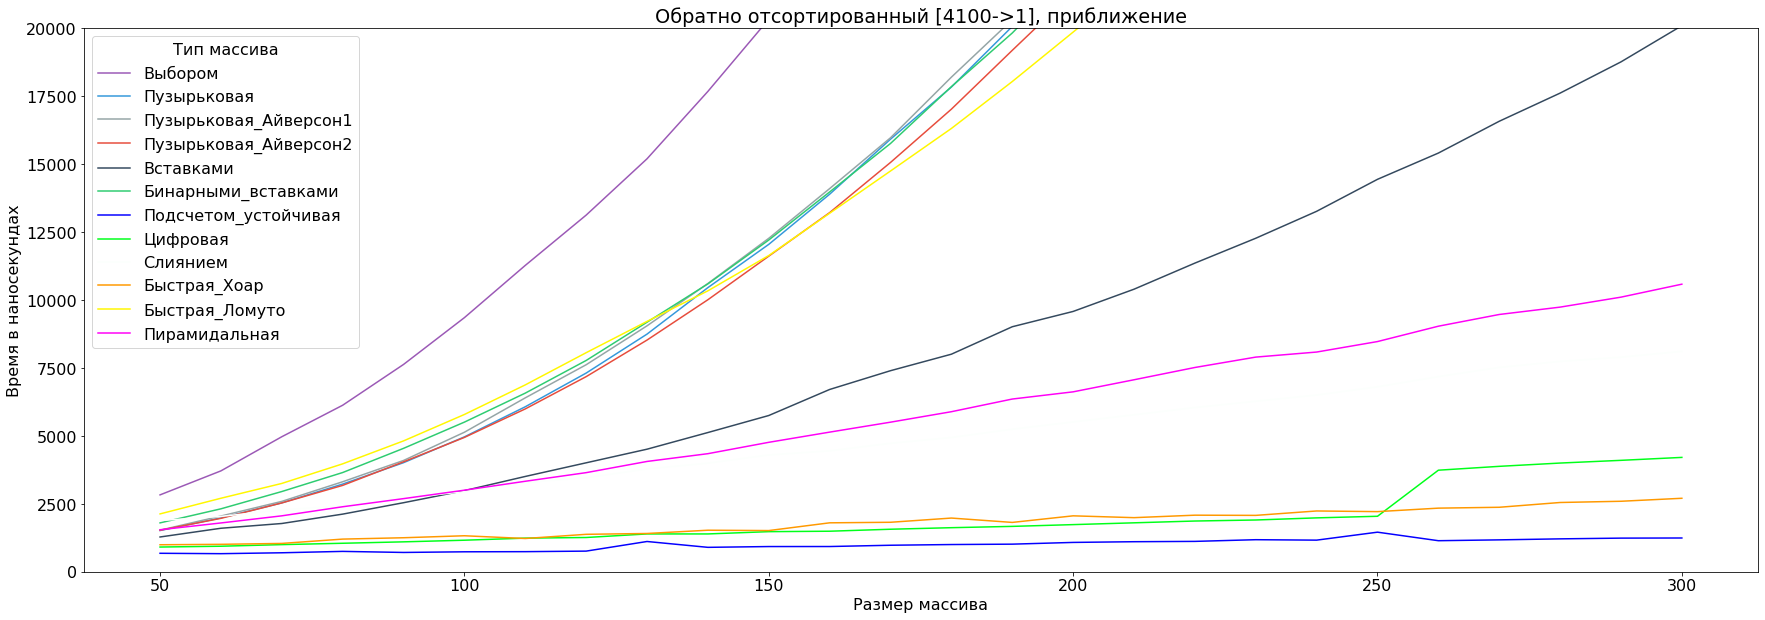

In [60]:
fig = plt.figure(figsize=(30, 10))
g = sns.lineplot(palette=pal,
                 data=pd.melt(new_data[3], 'Размер массива', var_name='Тип массива', value_name='Время в наносекундах'),
                 x='Размер массива', y='Время в наносекундах', hue='Тип массива')
g.set(ylim=(0, 2 * 10 ** 4))
g.set_title('Обратно отсортированный [4100->1], приближение')
plt.show()

Группировка по видам сортировок

In [61]:
new_data = list()
titles = list()

for i in range(1, 50, 4):
    data = df[df.columns[i:i + 4]]
    titles.append(data.columns[0][0:str(data.columns[0]).index(' ') + 1])
    data.insert(0, 'Размер массива', df.loc[:, 'Размер массива'])
    renamer = {k: k[k.index(' ') + 1:] for k in data.columns[1:]}
    data = data.rename(columns=renamer)
    new_data.append(data)

IndexError: index 0 is out of bounds for axis 0 with size 0

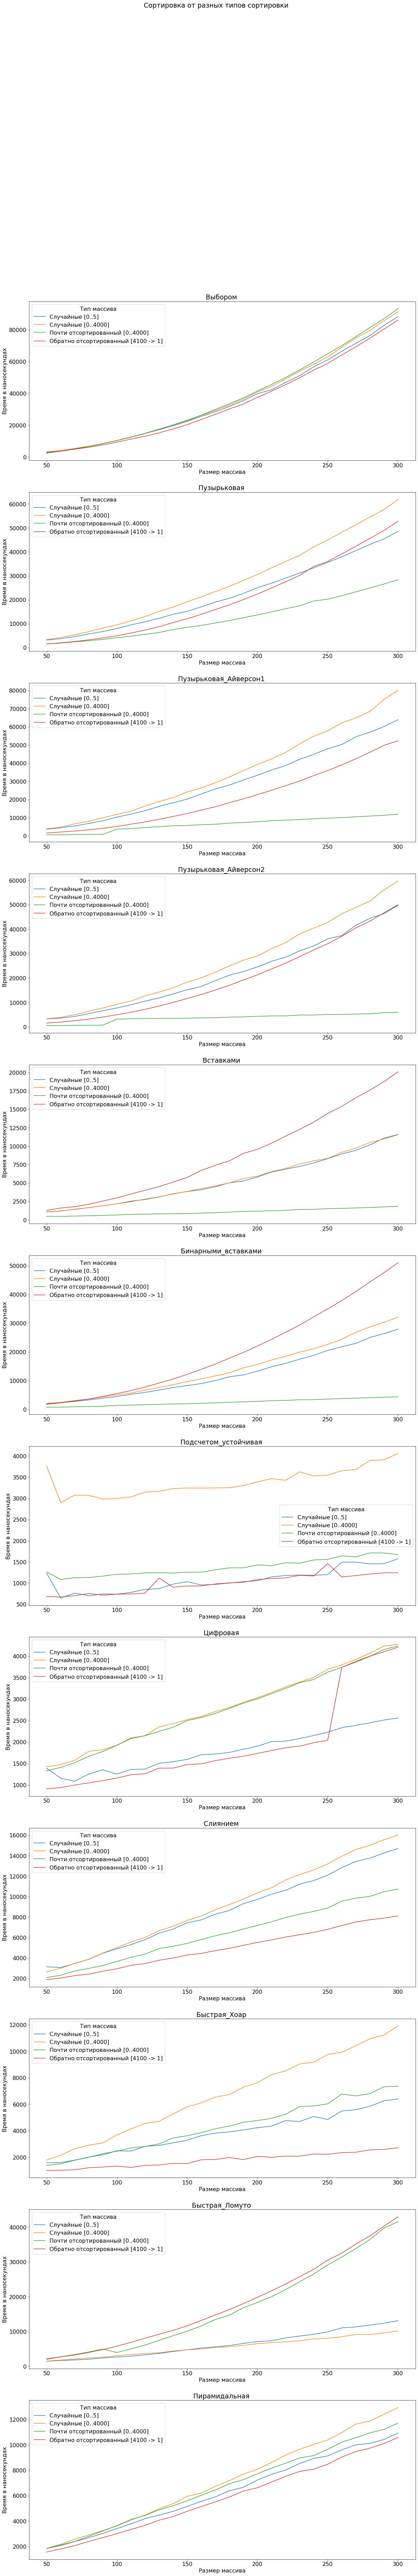

In [62]:
fig, axes = plt.subplots(len(new_data), 1, figsize=(20, 120))
plt.rcParams.update({'font.size': 16})
for ax in axes:
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(16)
fig.suptitle('Сортировка от разных типов сортировки')

pal = [
    "#9b59b6", "#3498db", "#95a5a6", "#e74c3c"
]

for ind, data in enumerate(new_data):
    sns.lineplot(
        ax=axes[ind],
        data=pd.melt(data, 'Размер массива', var_name='Тип массива', value_name='Время в наносекундах'),
        x='Размер массива', y='Время в наносекундах', hue='Тип массива')
    axes[ind].set_title(titles[ind])

#
# sns.lineplot(
#     ax=axes[len(new_data)],
#     data=pd.melt(new_data[-1], 'Размер массива', var_name='Тип массива', value_name='Время в наносекундах'),
#     x='Размер массива', y='Время в наносекундах', hue='Тип массива')
# axes[len(new_data)].set_title('Пирамидальная, приближение')
# axes[len(new_data)].set_ylim(bottom=0, top=3 * 10**5)
plt.show()